<a href="https://colab.research.google.com/github/nikhilans/CHDRisk-Classification/blob/main/CH_Nikhila_N_S_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning - Capstone Project 1 - Cardiovascular Risk Prediction**

### **Problem Statement** <br>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. <br>

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

### **Data Description**

#### **Demographic:**
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### **Behavioral:**
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### **Medical( history):**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

#### **Medical(current):**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

#### **Predict variable (desired target):**
**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

### Load the data

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 4: Machine Learning/Capstone Projects/Cardiovascular Risk Prediction - Nikhila N S/data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# check missing-values

df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* We have missing values in Education, cigPerDay, BPMeds, totChol, BMI, heartRate and glucose
* We will analyse these further in the later sections to check how to handle these missing values.

In [ ]:
# list of features in data

df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# creating list for numeric and categorical features
# id is a unique identifier; not considering

num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cat_cols = ['education', 'sex','is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [ ]:
# quick look at numeric features
df[num_cols].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3368.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000
mean,49.542183,9.069477,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520
std,8.592878,11.879078,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753
min,32.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,20.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [ ]:
# quick look at categorical columns

df[cat_cols].describe(include = 'all')

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,3303.000000,3390,3390,3346.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NO,NaN,NaN,NaN,NaN,NaN
freq,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN
mean,1.970936,NaN,NaN,0.029886,0.006490,0.315339,0.025664,0.150737
std,1.019081,NaN,NaN,0.170299,0.080309,0.464719,0.158153,0.357846
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
# check duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


We have no duplicate records

### Exploratory Data Analysis

#### Univariate Analysis

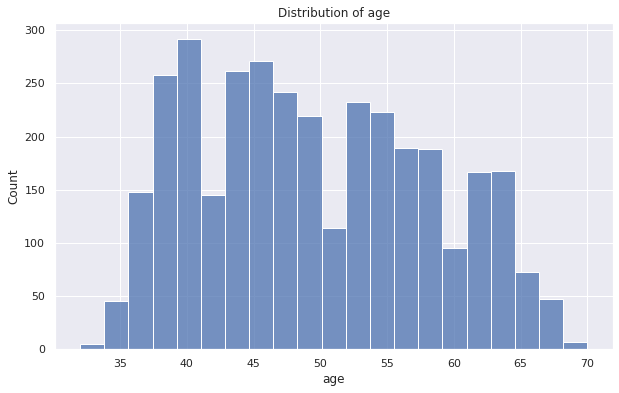

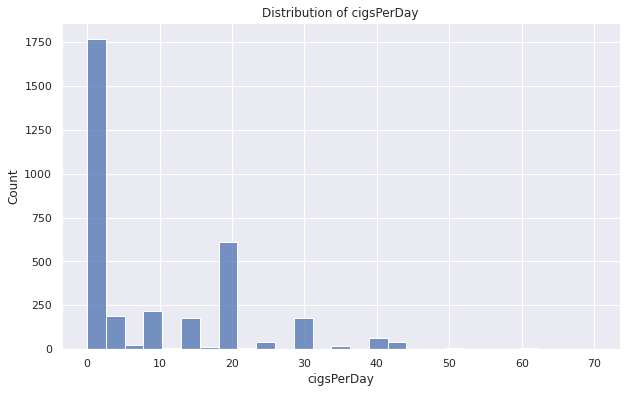

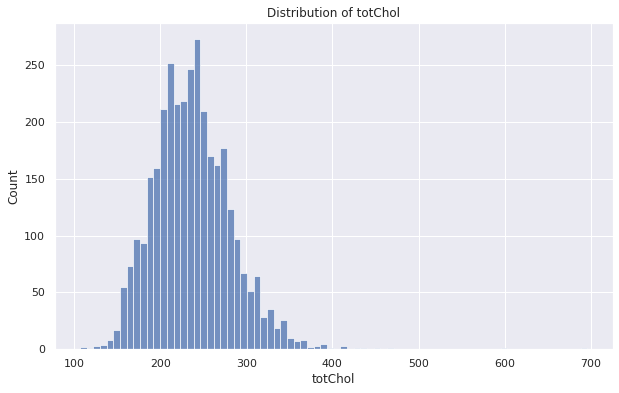

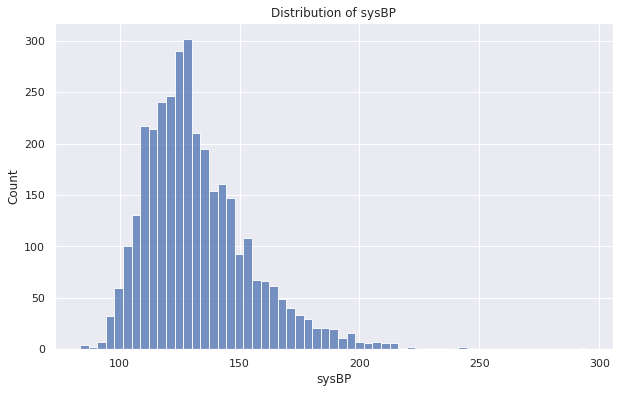

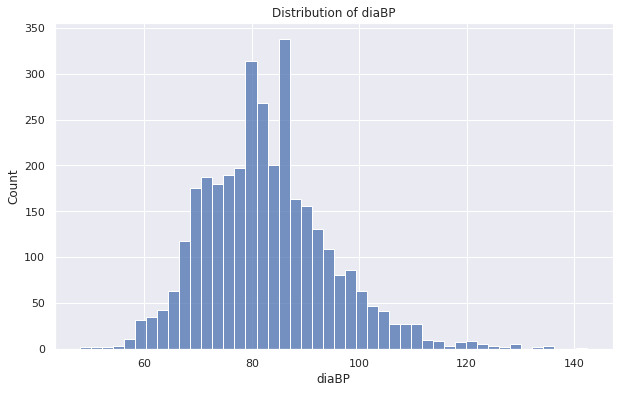

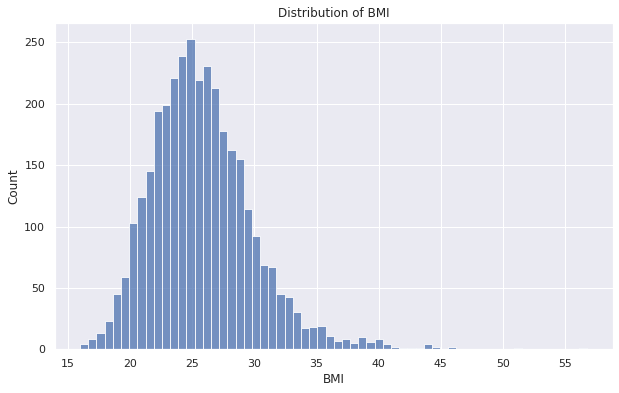

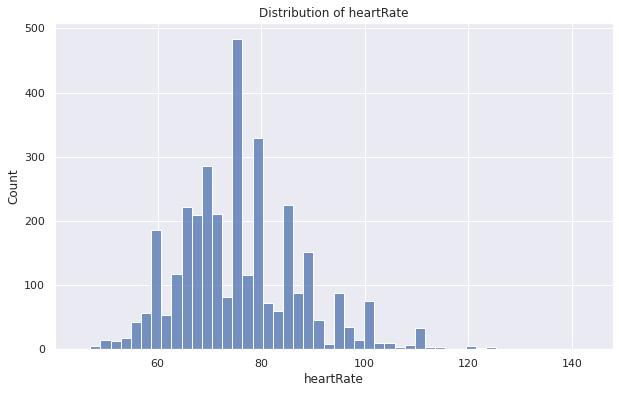

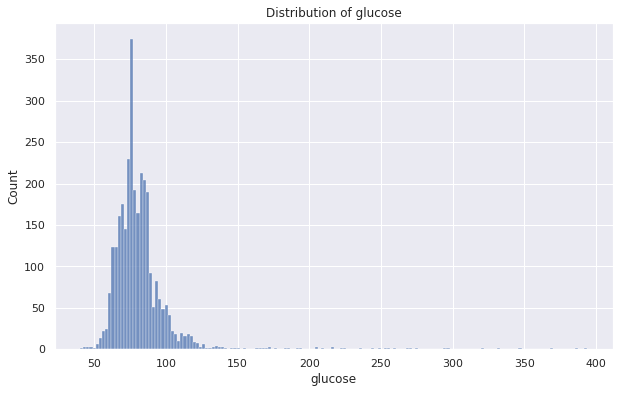

In [ ]:
# visualize the distributions for Numeric Features

for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

We can see some skewness in the data

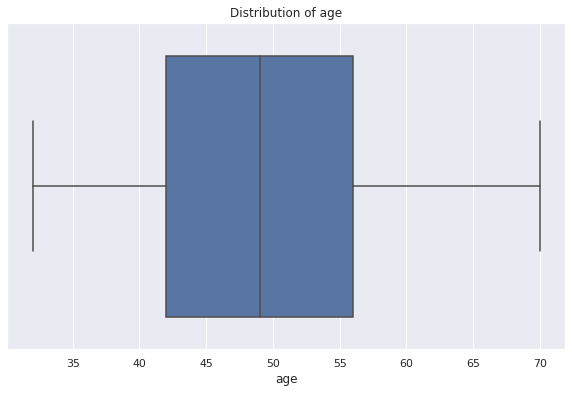

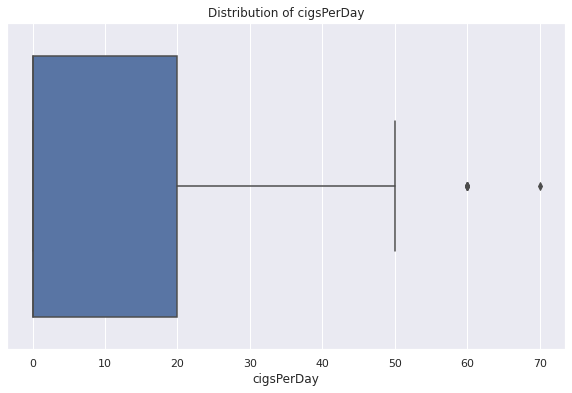

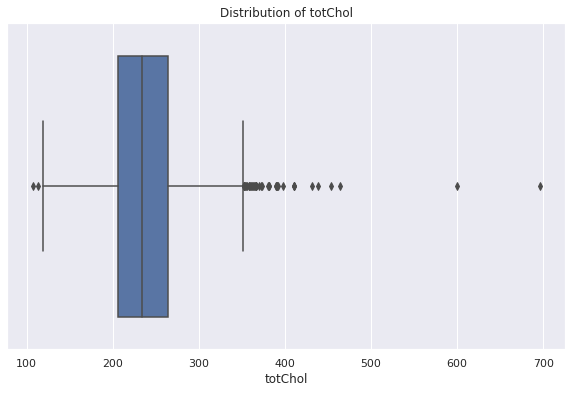

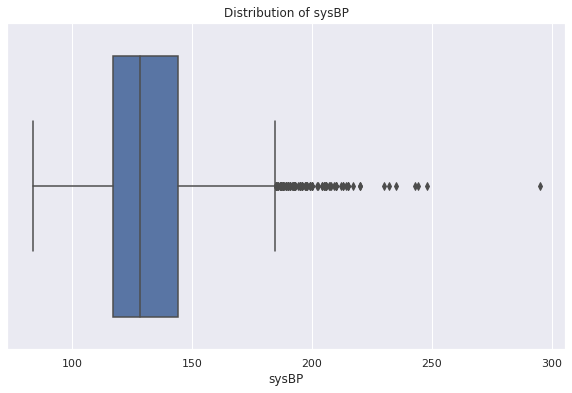

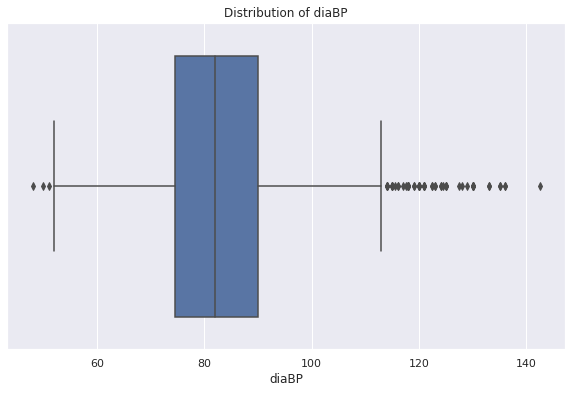

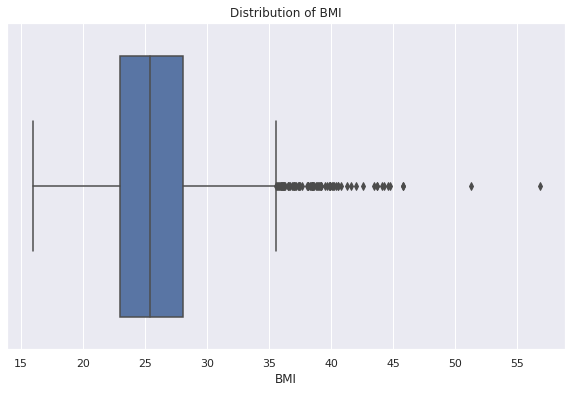

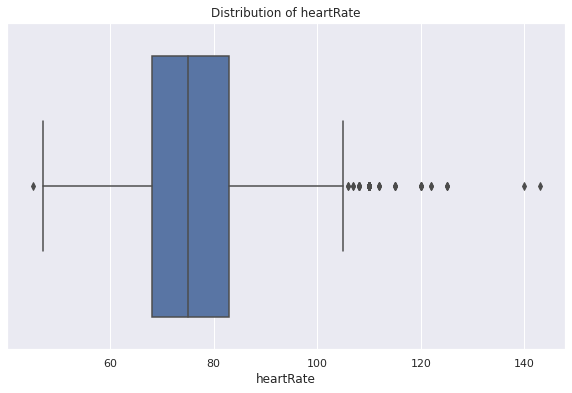

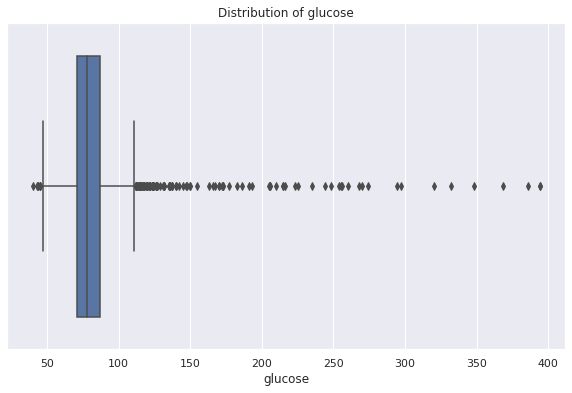

In [ ]:
# Box plot for Numeric Features

for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.boxplot(data=df, x=ii)
  plt.title(f'Distribution of {ii}')
  plt.show()

* We can see some outliers
* These outliers could be extreme cases.


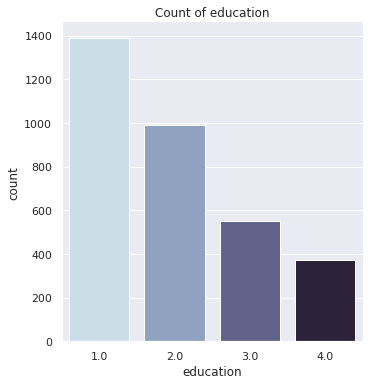

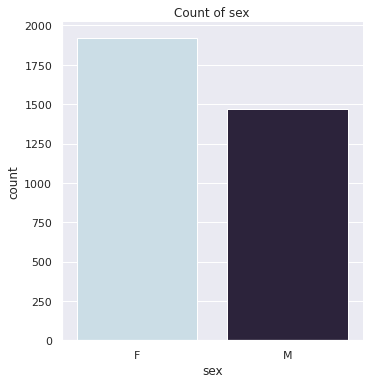

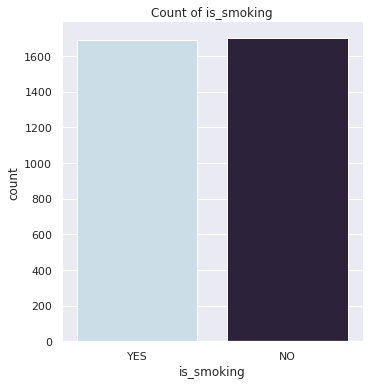

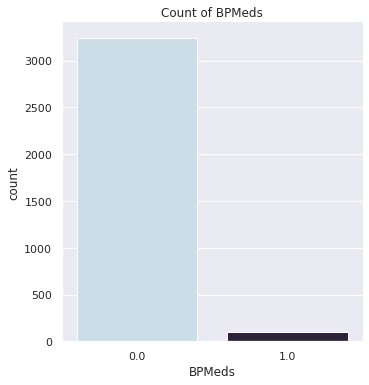

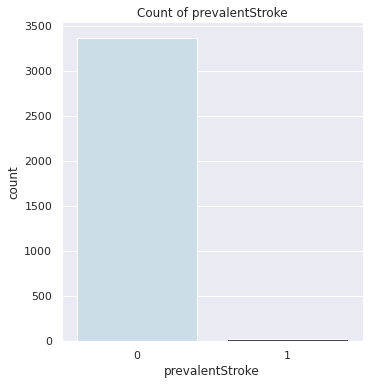

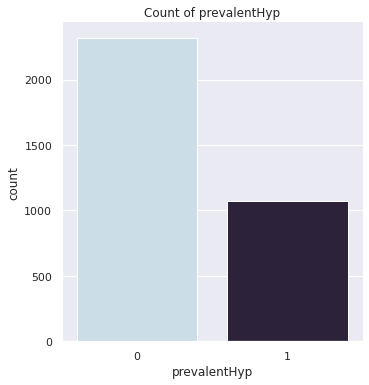

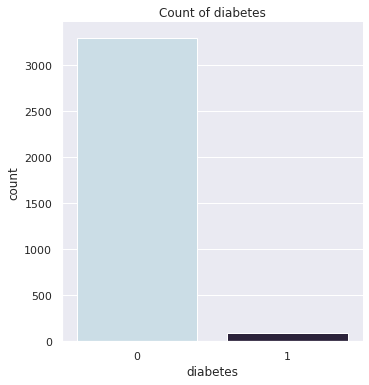

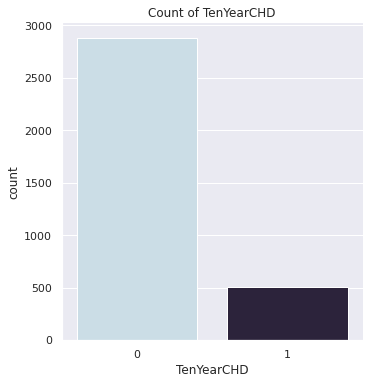

In [ ]:
# Categorical Features

for i, ii in enumerate(cat_cols):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, kind='count', palette="ch:s=.25,rot=-.25")
  plt.title(f'Count of {ii}')
  plt.show()

* We have an imbalanced dataset
* We will have to handle this before modelling

In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

#### Bivariate Analysis



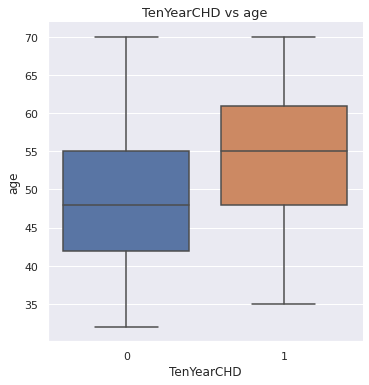

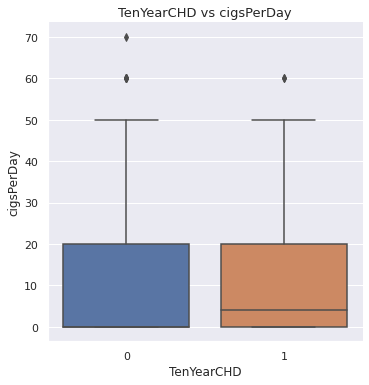

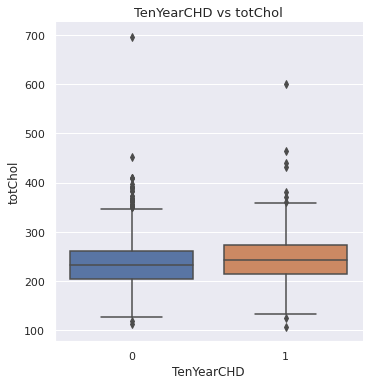

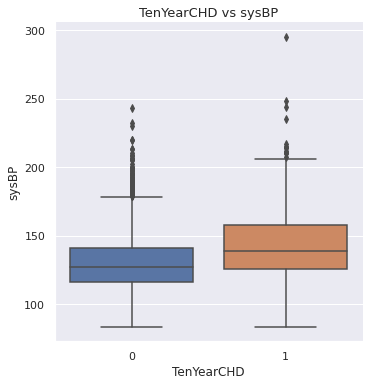

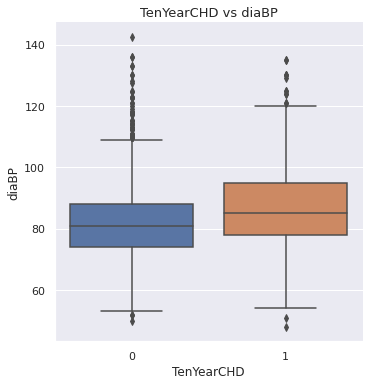

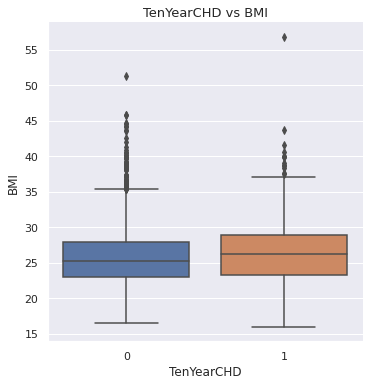

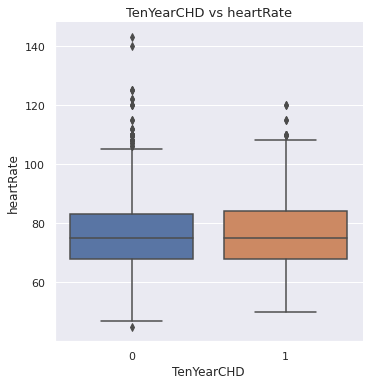

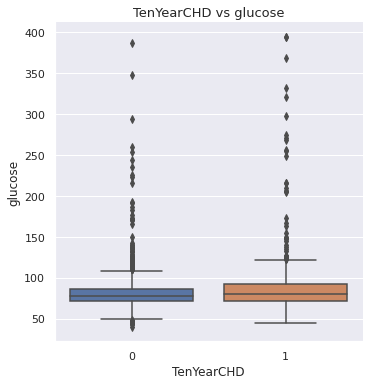

In [ ]:
# Dependent Variable vs numeric features
for i, ii in enumerate(num_cols):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, y=ii, x=cat_cols[-1], kind='box')
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

* We can see that the mean age of people who have a 10-year risk of CHD is higher than those without the risk.
* The average sysBP and diaBP is also higher for those who are classified as having risk of CHD

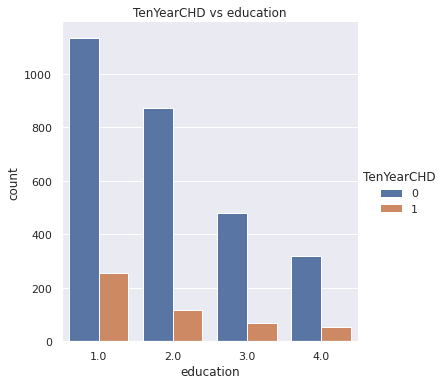

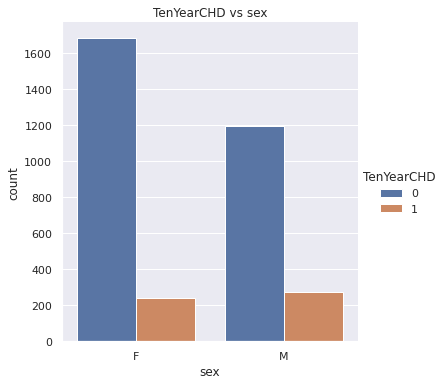

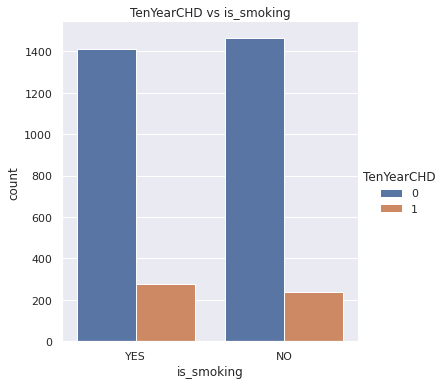

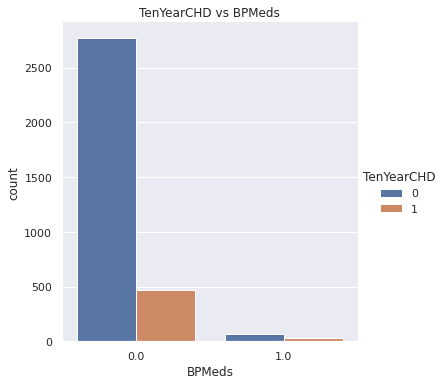

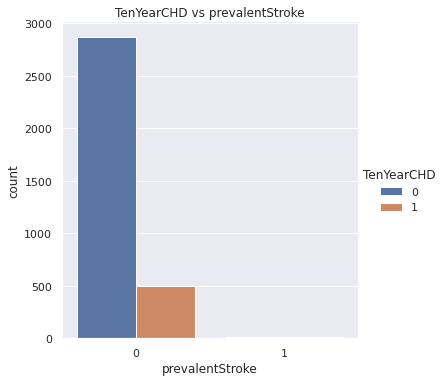

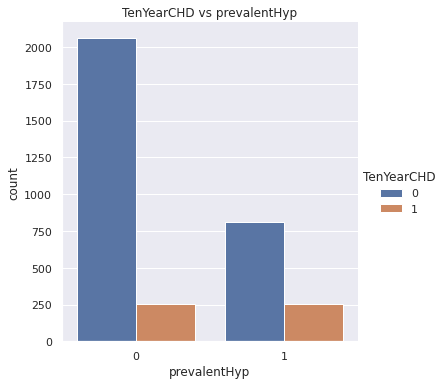

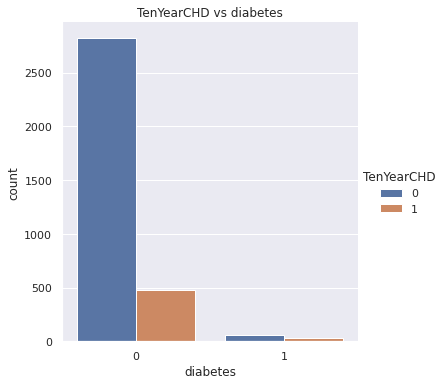

In [ ]:
# Dependent variable vs categorical features

for i, ii in enumerate(cat_cols[:-1]):
  # plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, hue=cat_cols[-1], kind='count')
  plt.title(f'TenYearCHD vs {ii}')
  plt.show()

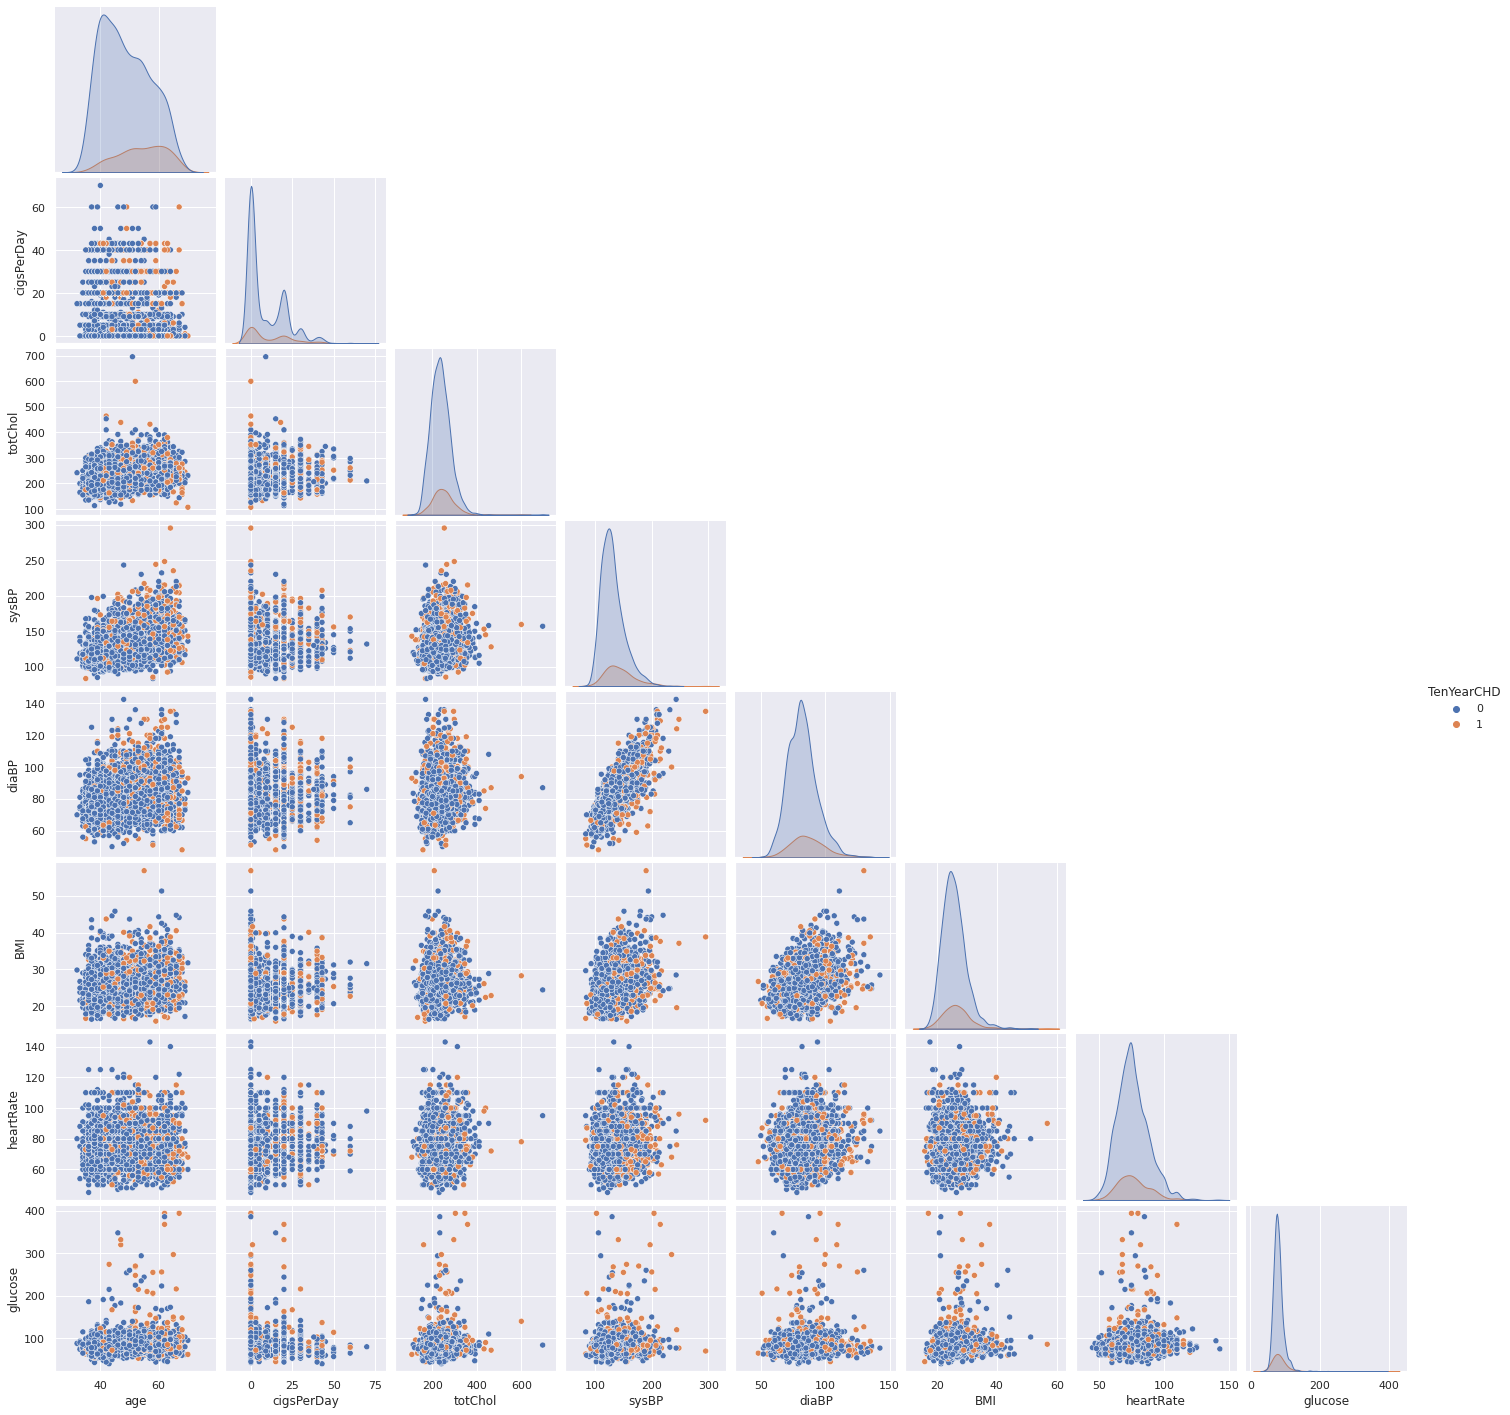

In [ ]:
# pairplot

sns.pairplot(data=df, vars=num_cols, hue=cat_cols[-1], corner=True)
plt.show()

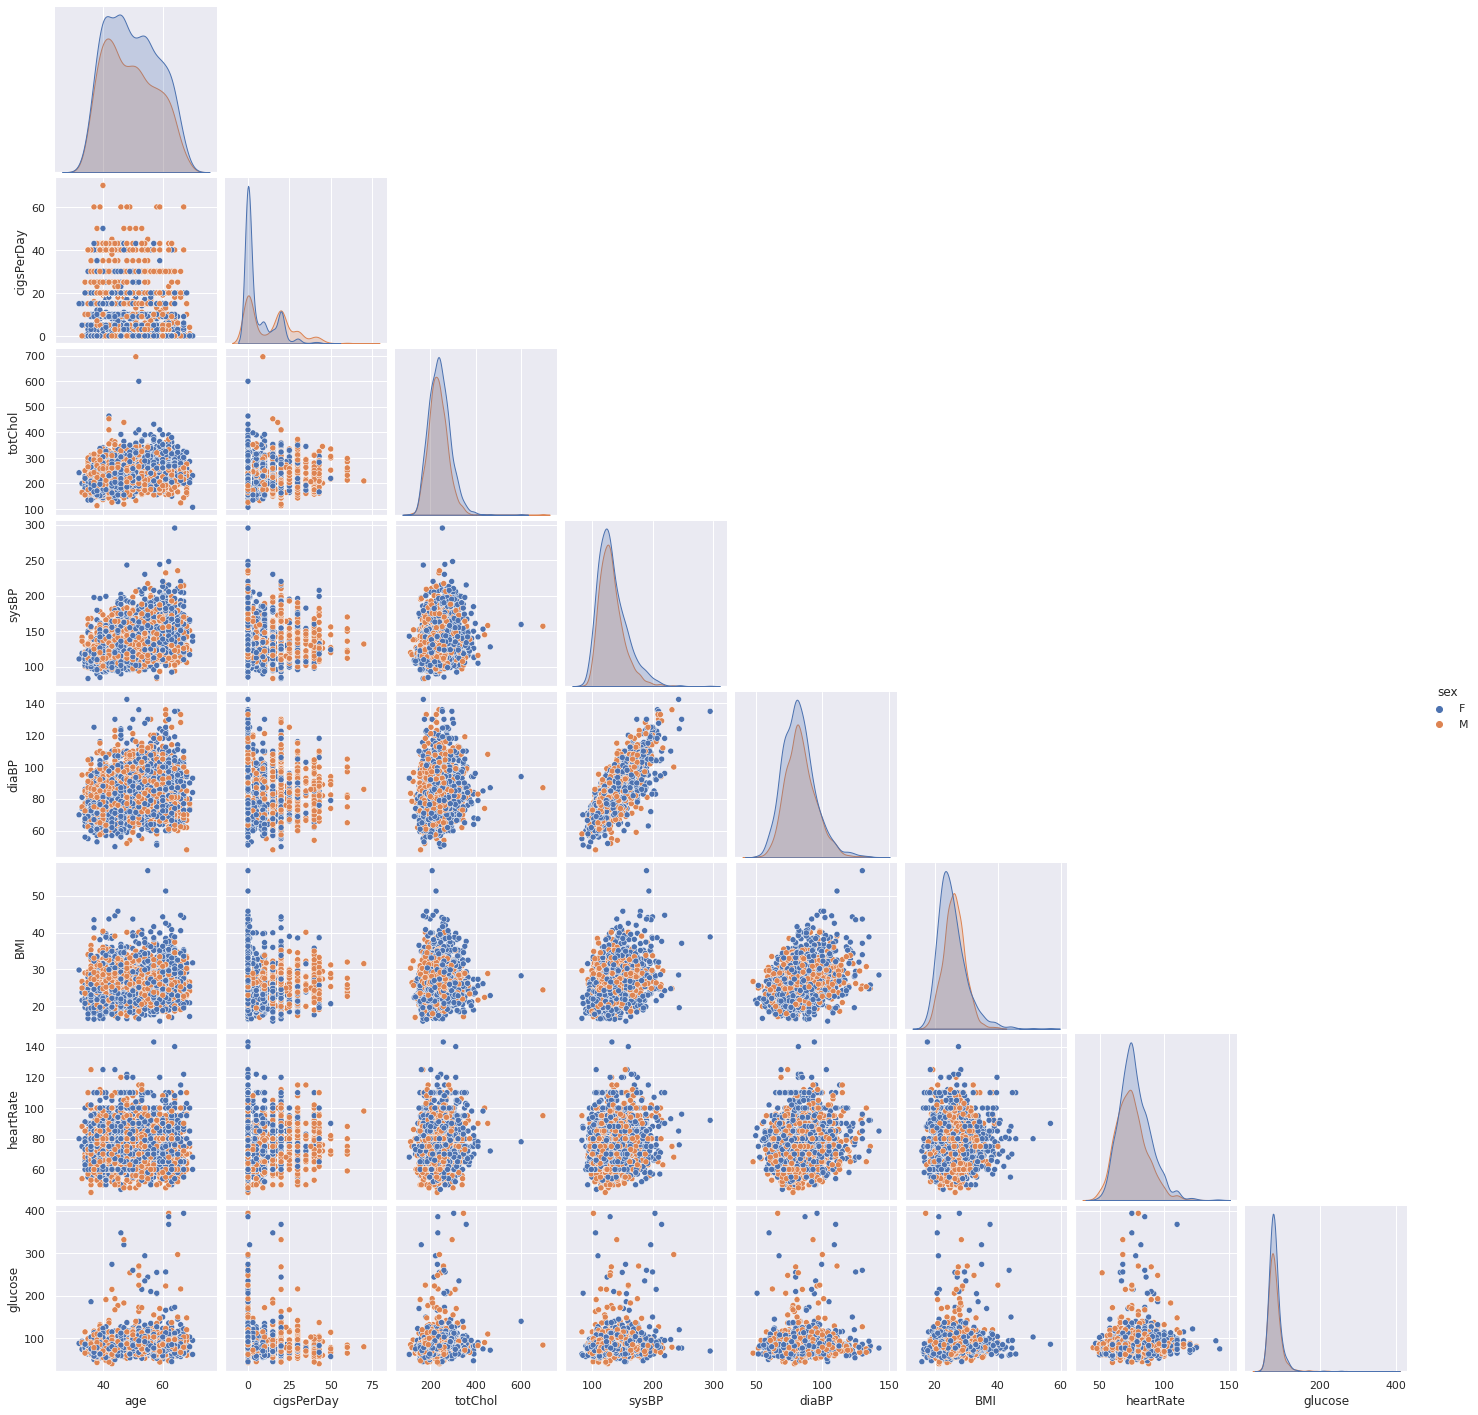

In [ ]:
sns.pairplot(data=df, vars=num_cols, hue='sex', corner=True)
plt.show()

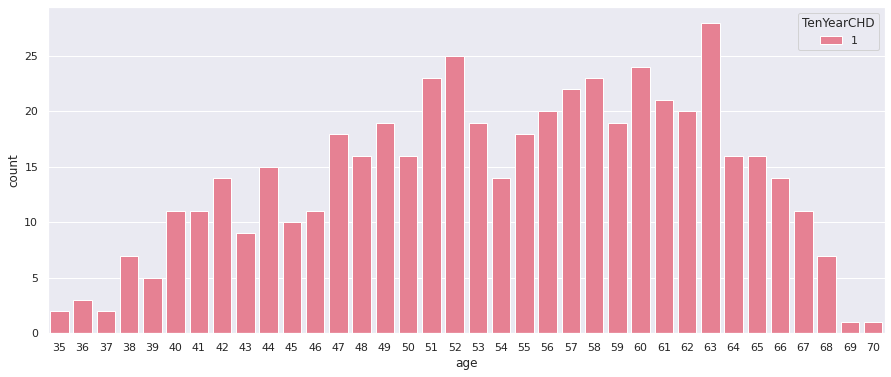

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df[df['TenYearCHD']==1], hue = 'TenYearCHD', palette='husl')
plt.show()

In [ ]:
df.drop('id', inplace=True, axis=1)

In [ ]:
df['sex_num'] = np.where(df.sex=='F', 1, 0)
df['is_smoking_num'] = np.where(df['is_smoking']=='YES', 1, 0)

In [ ]:
df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_num,is_smoking_num
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,1,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,1


In [ ]:
df_new = df.drop(['sex', 'is_smoking'], axis=1).copy()

In [ ]:
df_new.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_num,is_smoking_num
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,1,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,1


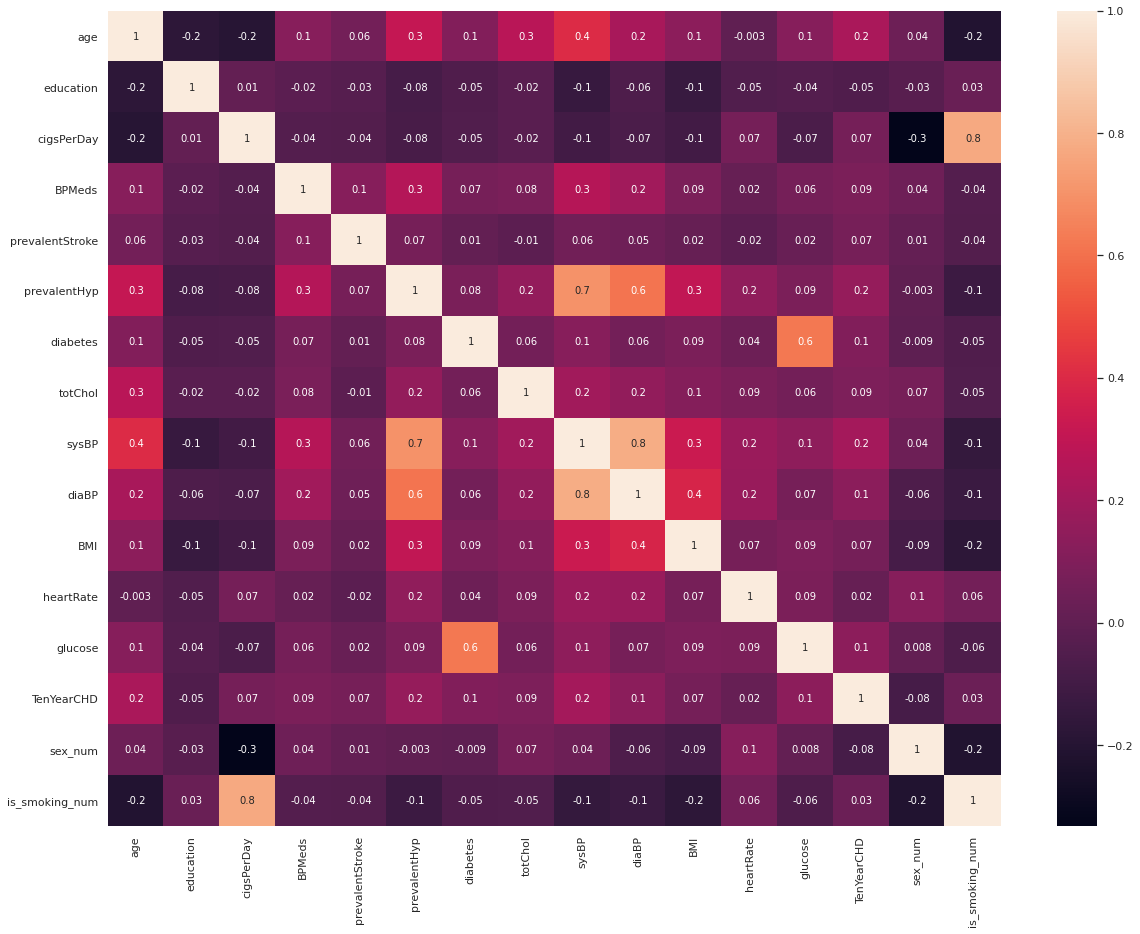

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(df_new.corr(), annot = True, fmt='.1g')
plt.show()

* There are no features that have a correlation with the dependant variable. 
* We see some obvious correlations between - sysBP and diaBP and prevalentHP, glucose and diabetes, is_smoking and cigsPerDay

### Handling Missing Values

In [ ]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
sex_num              0
is_smoking_num       0
dtype: int64

**Education** <br>
Has 87 missing values. It is a categorical variable. We have no information about this feature. It also has no correlation with the dependant variable. We will impute the missing values the mode and not the drop the feature for now. 

In [ ]:
df.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
# Imputing 1 for missing values in education
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [ ]:
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

**cigsPerDay** <br>
Has 22 missing values. All the 22 records have is_smoking = YES. This is a continuous variable. We check the distribution of the feature when is_smoking = YES. When is_smoking = NO, cigsPerDay will be 0.

In [ ]:
df[df['cigsPerDay'].isnull()]['is_smoking'].value_counts()

YES    22
Name: is_smoking, dtype: int64

In [ ]:
df.groupby(['cigsPerDay','is_smoking'])['cigsPerDay'].count().unstack()

is_smoking,NO,YES
cigsPerDay,,
0.0,1703.0,NaN
1.0,NaN,48.0
2.0,NaN,17.0
3.0,NaN,79.0
4.0,NaN,7.0
5.0,NaN,103.0
6.0,NaN,14.0
7.0,NaN,8.0
8.0,NaN,10.0


* As we can see from the table, when is_smoking = NO, the number of cigarettes smoked is 0.
* We can see that the mode of cigsPerDay for the class is_smoking = YES is 20.

In [ ]:
print('is_smoking = YES \n')
print('** mean of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].mean())
print('** median of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].median())
print('** mode of cigsPerDay =', df[df['is_smoking']=='YES']['cigsPerDay'].mode())

is_smoking = YES 

** mean of cigsPerDay = 18.345945945945946
** median of cigsPerDay = 20.0
** mode of cigsPerDay = 0    20.0
dtype: float64


We can see that the median and mode are the same, and the mean is pretty close to median and mode. We can impute the missing values with either median or mode, which is 20

In [ ]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']=='YES']['cigsPerDay'].median())

In [ ]:
df.groupby(['cigsPerDay','is_smoking'])['cigsPerDay'].count().unstack()

is_smoking,NO,YES
cigsPerDay,,
0.0,1703.0,NaN
1.0,NaN,48.0
2.0,NaN,17.0
3.0,NaN,79.0
4.0,NaN,7.0
5.0,NaN,103.0
6.0,NaN,14.0
7.0,NaN,8.0
8.0,NaN,10.0


**BPMeds** <br>
Has 44 missing values. 

In [ ]:
df[df['BPMeds'].isna()][['sysBP', 'diaBP']].describe()

,sysBP,diaBP
count,44.000000,44.000000
mean,140.125000,84.534091
std,26.189188,15.222916
min,102.000000,63.000000
25%,120.750000,74.500000
50%,133.000000,82.500000
75%,153.125000,90.000000
max,208.000000,136.000000


In [ ]:
df[df['BPMeds'].isna()]['prevalentHyp'].value_counts()

0    25
1    19
Name: prevalentHyp, dtype: int64

We cannot arrive at an reasonable way of imputing missing values for BPMeds. We can drop these values.

**glucose** <br>
Has 304 missing values

In [ ]:
df[df['glucose'].isnull()]['diabetes'].value_counts()

0    301
1      3
Name: diabetes, dtype: int64

In [ ]:
print('diabetes = NO \n')
print('** mean of glucose =', df[df['diabetes']==0]['glucose'].mean())
print('** median of glucose =', df[df['diabetes']==0]['glucose'].median())
print('** mode of glucose =', df[df['diabetes']==0]['glucose'].mode())

diabetes = NO 

** mean of glucose = 79.57161892071952
** median of glucose = 78.0
** mode of glucose = 0    75.0
dtype: float64


In [ ]:
print('diabetes = YES \n')
print('** mean of glucose =', df[df['diabetes']==1]['glucose'].mean())
print('** median of glucose =', df[df['diabetes']==1]['glucose'].median())
print('** mode of glucose =', df[df['diabetes']==1]['glucose'].mode())

diabetes = YES 

** mean of glucose = 171.96428571428572
** median of glucose = 150.0
** mode of glucose = 0    120.0
dtype: float64


In [ ]:
df['glucose'] = np.where(df['diabetes']==0, df['glucose'].fillna(df[df['diabetes']==0]['glucose'].median()), df['glucose'].fillna(df[df['diabetes']==1]['glucose'].median()))

In [ ]:
df.isna().sum()

age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            38
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
sex_num             0
is_smoking_num      0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(3294, 18)

### Pre-processing

In [ ]:
df.drop(['sex_num', 'is_smoking_num'], axis=1, inplace=True)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
df_new = pd.get_dummies(df, prefix=['sex', 'is_smoking'], prefix_sep='_', columns=[ 'sex', 'is_smoking'])

In [ ]:
df_new.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1
5,61,3.0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1,0,1,0


In [ ]:
X = df_new.drop('TenYearCHD', axis=1)
y = df_new.loc[:, 'TenYearCHD']

In [ ]:
X.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,1,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,0,1,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,1,0,0,1
5,61,3.0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,0,1,0


In [ ]:
X.shape

(3294, 17)

In [ ]:
X.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES
count,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000
mean,49.441409,1.948087,9.127201,0.029447,0.005768,0.312690,0.025501,237.085914,132.410140,82.862933,25.796727,75.958409,81.737705,0.560716,0.439284,0.503339,0.496661
std,8.548040,1.017330,11.860303,0.169083,0.075740,0.463659,0.157665,45.156732,22.115743,11.955135,4.115044,12.028326,23.164953,0.496375,0.496375,0.500065,0.500065
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.020000,68.000000,72.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,1.000000,0.000000,1.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,90.000000,28.035000,83.000000,85.000000,1.000000,1.000000,1.000000,1.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=56)

### Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2635
Resampled dataset shape 4480


In [ ]:
X_smote.shape

(4480, 17)

In [ ]:
from collections import Counter

num_before = dict(Counter(y_train))

num_after = dict(Counter(y_smote))


In [ ]:
print(num_before, num_after)

{0: 2240, 1: 395} {0: 2240, 1: 2240}


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_smote)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:1]

array([[0.56756757, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20754717, 0.1952381 , 0.26455026,
        0.31954023, 0.30612245, 0.14124294, 1.        , 0.        ,
        1.        , 0.        ]])

In [ ]:
y_train = y_smote

In [ ]:
print(X_train.shape, y_train.shape)

(4480, 17) (4480,)


In [ ]:
print(X_test.shape, y_test.shape)

(659, 17) (659,)


### Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [ ]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_model.score(X_train, y_train)

0.6859375

In [ ]:
parameters = {'C': (0.01, 0.1, 1, 10, 100)}

In [ ]:
lr_grid = GridSearchCV(estimator=lr_model, param_grid = parameters, cv = 5, verbose=2, scoring='recall')
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 10, 100)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='recall', verbose=2)

In [ ]:
lr_grid.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_model.score(X_train, y_train)

0.6859375

In [ ]:
lr_optimal_model = lr_grid.best_estimator_

In [ ]:
# make predictions
logistic_predict = lr_optimal_model.predict(X_test)

In [ ]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 62.06%


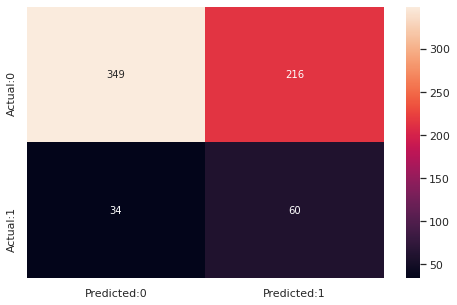

In [ ]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       565
           1       0.22      0.64      0.32        94

    accuracy                           0.62       659
   macro avg       0.56      0.63      0.53       659
weighted avg       0.81      0.62      0.68       659



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()

In [ ]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [ ]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8}

In [ ]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [ ]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 75.87%


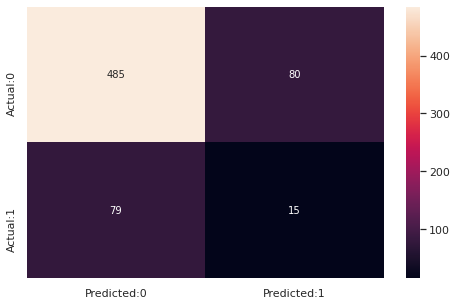

In [ ]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       565
           1       0.16      0.16      0.16        94

    accuracy                           0.76       659
   macro avg       0.51      0.51      0.51       659
weighted avg       0.76      0.76      0.76       659



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 50}

In [ ]:
rf_optimal_model.predict(X_train)

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
train_preds =  rf_optimal_model.predict(X_train)
test_preds  = rf_optimal_model.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds), accuracy_score(y_test,test_preds)

(0.8118303571428571, 0.7298937784522003)

In [ ]:
roc_auc_score(y_train,train_preds), roc_auc_score(y_test,test_preds)

(0.811830357142857, 0.558689512332894)

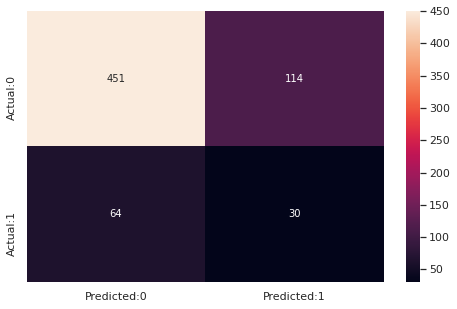

In [ ]:
cm=confusion_matrix(y_test,test_preds)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       565
           1       0.21      0.32      0.25        94

    accuracy                           0.73       659
   macro avg       0.54      0.56      0.54       659
weighted avg       0.78      0.73      0.75       659



In [ ]:
features = X.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

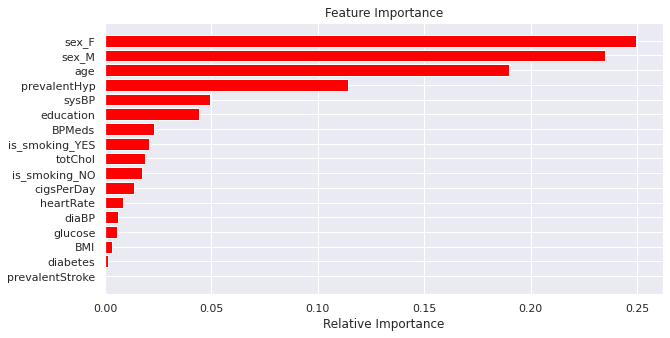

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

* Precision is the ratio between the True Positives and all the Positives.
* For our problem statement, that would be the measure of patients that we correctly identify having a risk of heart disease out of all the patients actually having it. 

* The recall is the measure of our model correctly identifying True Positives.
* For all the patients who actually have risk of CHD, recall tells us how many we correctly identified as having risk of CHD.

* create bins
* XGBoost
* Stratified K-Fold Cross Validation
* Try converting to regression problem - 
 